In [153]:
# Загрузим все необходимые библиотеки
import os
import numpy as np
import pandas as pd

import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# Без этой магической команды графики не отобразятся в ячейке Блокнота
%matplotlib inline
import matplotlib.pyplot as plt # Библиотека для построения графиков
import seaborn as sns # Еще одна библиотека для построения графиков, работает как обертка над предыдущей



In [154]:
df = pd.read_csv(r'C:\Users\user\Desktop\vgsale_1 (1).csv')

In [155]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [157]:
df = df.drop_duplicates()
dfdo2000 = df[df['Year'] < 2000]
do2000 = dfdo2000.groupby('Genre')['Global_Sales'].sum().reset_index()

dfposle2000 = df[df['Year'] >= 2000]
posle2000 = dfposle2000.groupby('Genre')['Global_Sales'].sum().reset_index()

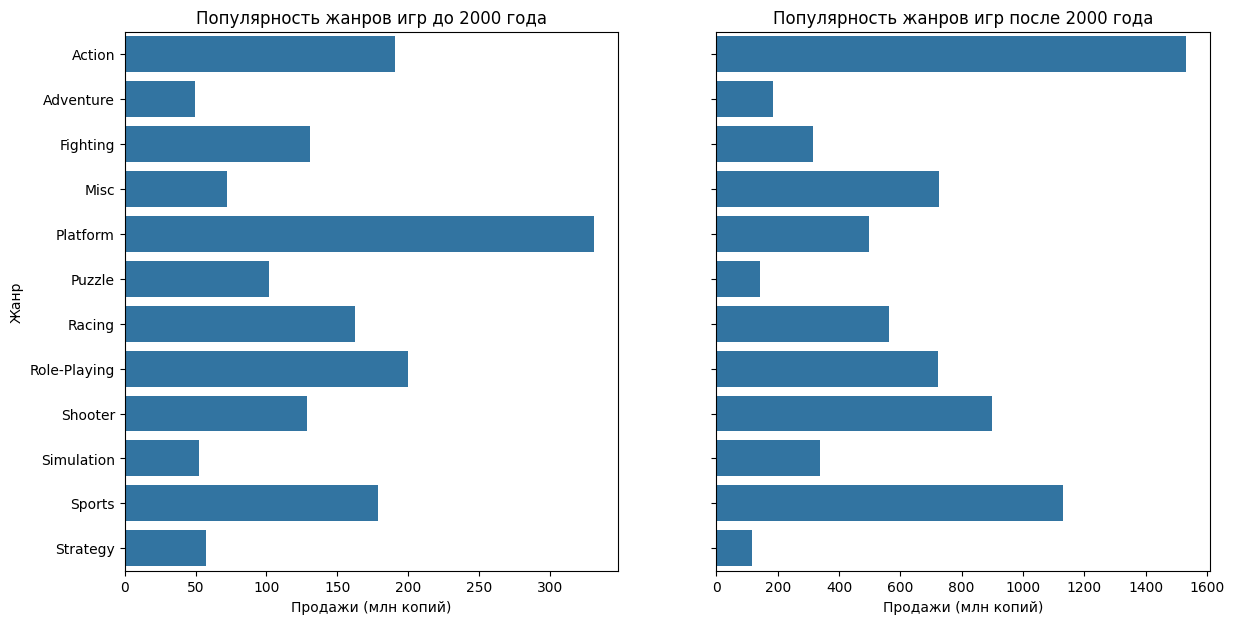

In [158]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

sns.barplot(x='Global_Sales', y='Genre', data=do2000, ax=axes[0])
axes[0].set_title('Популярность жанров игр до 2000 года')
axes[0].set_xlabel('Продажи (млн копий)')
axes[0].set_ylabel('Жанр')

sns.barplot(x='Global_Sales', y='Genre', data=posle2000, ax=axes[1])
axes[1].set_title('Популярность жанров игр после 2000 года')
axes[1].set_xlabel('Продажи (млн копий)')
axes[1].set_ylabel('')


plt.show()

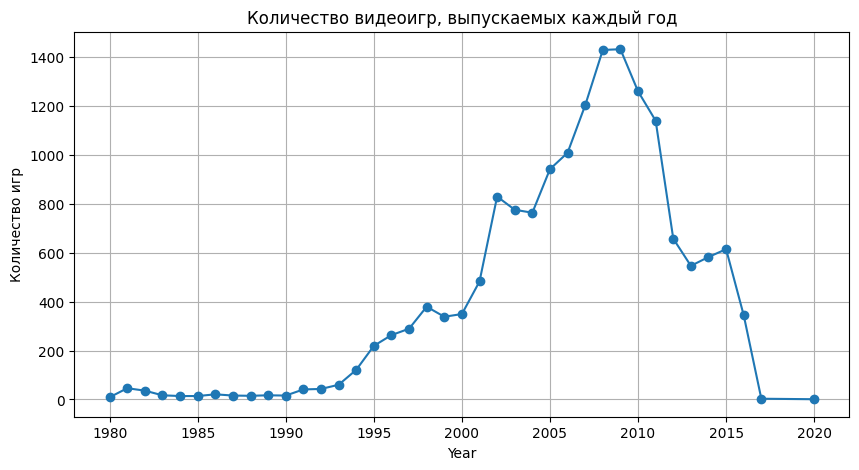

In [163]:

games=df.groupby('Year').size()
plt.figure(figsize=(10, 5))
plt.plot(games.index, games.values, marker='o')
plt.title('Количество видеоигр, выпускаемых каждый год')
plt.xlabel('Year')
plt.ylabel('Количество игр')
plt.grid(True)
plt.show()

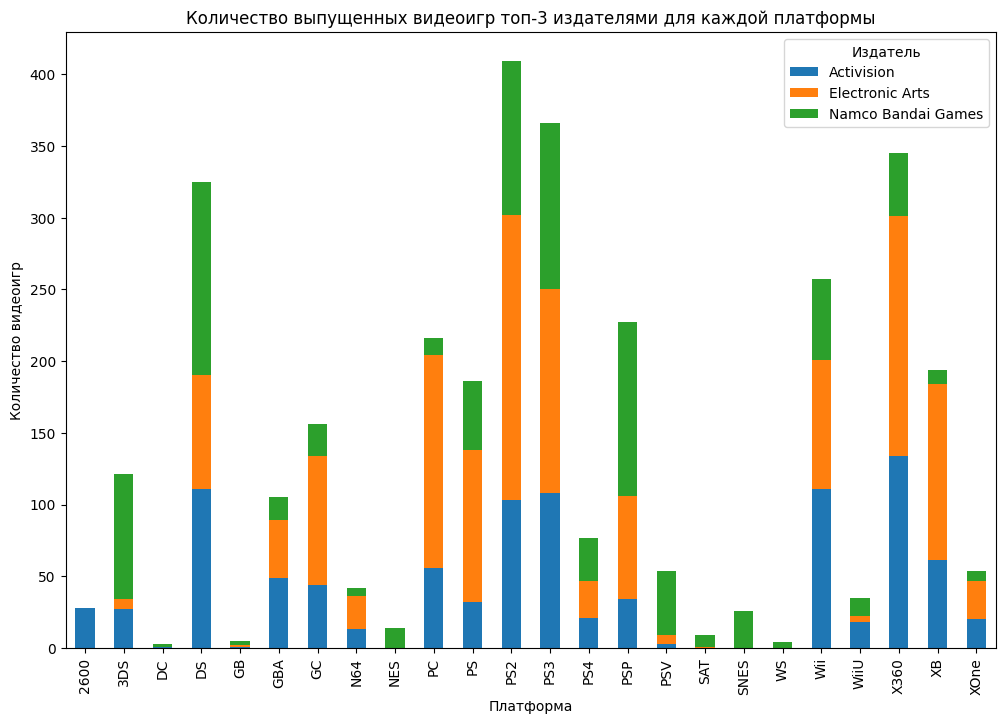

In [167]:
topPB=df['Publisher'].value_counts().head(3).index
topPB=df[df['Publisher'].isin(topPB)]
platformPB=topPB.groupby(['Platform', 'Publisher']).size().unstack().fillna(0)
platformPB.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Количество выпущенных видеоигр топ-3 издателями для каждой платформы')
plt.xlabel('Платформа')
plt.ylabel('Количество видеоигр')
plt.legend(title='Издатель')
plt.show()



In [168]:
df_80_00=df[(df['Year'] >= 1980) &(df['Year'] <= 2000)]
df_00_20=df[(df['Year'] > 2000) &(df['Year'] <= 2020)]

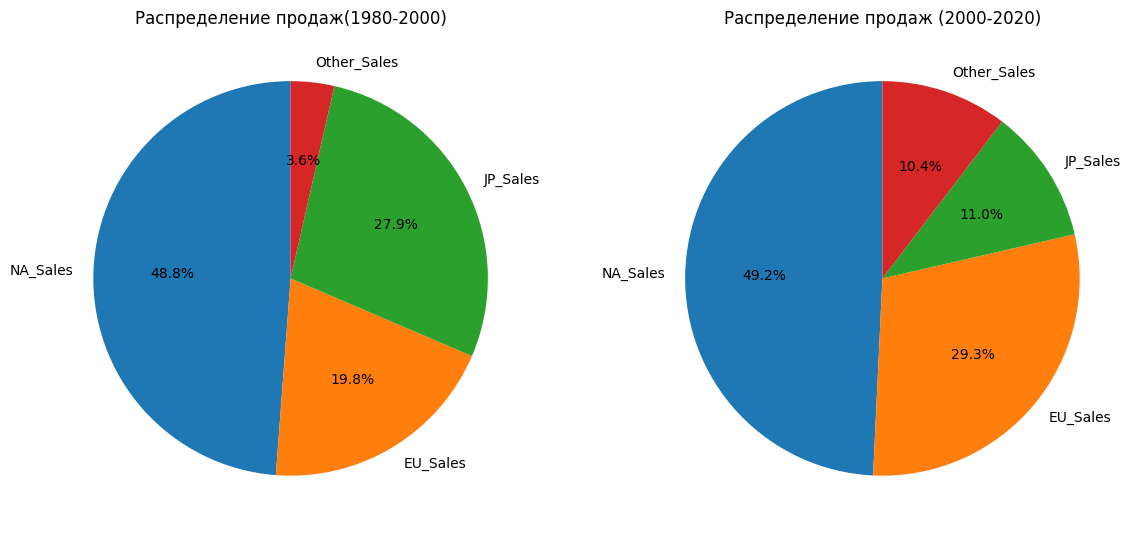

In [173]:

sales_80=df_80_00[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
sales_00=df_00_20[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Диаграмма для периода 1980-2000
axs[0].pie(sales_80, labels=sales_80.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Распределение продаж(1980-2000)')

# Диаграмма для периода 2000-2020
axs[1].pie(sales_00, labels=sales_00.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Распределение продаж (2000-2020)')

plt.show()